# Context:
This dataset contains the medical records of 5000 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_failure_clinical_records.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


<!-- # Attribute Information:
# age: age of the patient (years)
# anaemia: decrease of red blood cells or hemoglobin (boolean)
# creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
# diabetes: if the patient has diabetes (boolean)
# ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
# high blood pressure: if the patient has hypertension (boolean)
# platelets: platelets in the blood (kiloplatelets/mL)
# sex: woman or man (binary)
# serum creatinine: level of serum creatinine in the blood (mg/dL)
# serum sodium: level of serum sodium in the blood (mEq/L)
# smoking: if the patient smokes or not (boolean)
# time: follow-up period (days)
# DEATH_EVENT: if the patient died during the follow-up period (boolean) -->

<!-- Attribute Information:
age: age of the patient (years)
anaemia: decrease of red blood cells or hemoglobin (boolean)
creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
diabetes: if the patient has diabetes (boolean)
ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
high blood pressure: if the patient has hypertension (boolean)
platelets: platelets in the blood (kiloplatelets/mL)
sex: woman or man (binary)
serum creatinine: level of serum creatinine in the blood (mg/dL)
serum sodium: level of serum sodium in the blood (mEq/L)
smoking: if the patient smokes or not (boolean)
time: follow-up period (days)
DEATH_EVENT: if the patient died during the follow-up period (boolean) -->

Attribute Information:
--------------------------
age: age of the patient (years)

anaemia: decrease of red blood cells or hemoglobin (boolean)

creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)

diabetes: if the patient has diabetes (boolean)

ejection fraction: percentage of blood leaving the heart at each contraction (percentage)

high blood pressure: if the patient has hypertension (boolean)

platelets: platelets in the blood (kiloplatelets/mL)

sex: woman or man (binary)

serum creatinine: level of serum creatinine in the blood (mg/dL)

serum sodium: level of serum sodium in the blood (mEq/L)

smoking: if the patient smokes or not (boolean)

time: follow-up period (days)

DEATH_EVENT: if the patient died during the follow-up period (boolean)

# EDA

In [3]:
df.shape

(5000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.nunique()

age                          48
anaemia                       2
creatinine_phosphokinase    290
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   203
serum_creatinine             43
serum_sodium                 27
sex                           2
smoking                       2
time                        155
DEATH_EVENT                   2
dtype: int64

In [7]:
df.duplicated().sum()

3680

In [8]:
df.drop_duplicates()

df.shape

(5000, 13)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4051.0,58.642232,10.118890,40.0,50.0,60.00,65.0,82.0
anaemia,4051.0,0.490496,0.499971,0.0,0.0,0.00,1.0,1.0
creatinine_phosphokinase,4051.0,450.189336,519.755569,25.0,118.0,231.00,582.0,2522.0
diabetes,4051.0,0.445075,0.497035,0.0,0.0,0.00,1.0,1.0
ejection_fraction,4051.0,37.442607,11.228331,15.0,30.0,38.00,45.0,60.0
high_blood_pressure,4051.0,0.380647,0.485606,0.0,0.0,0.00,1.0,1.0
platelets,4051.0,259142.464838,75465.751356,70000.0,215000.0,263358.03,305000.0,461000.0
serum_creatinine,4051.0,1.147319,0.390969,0.5,0.9,1.10,1.2,3.0
serum_sodium,4051.0,137.287090,3.612841,128.0,135.0,137.00,140.0,145.0
sex,4051.0,0.628240,0.483334,0.0,0.0,1.00,1.0,1.0


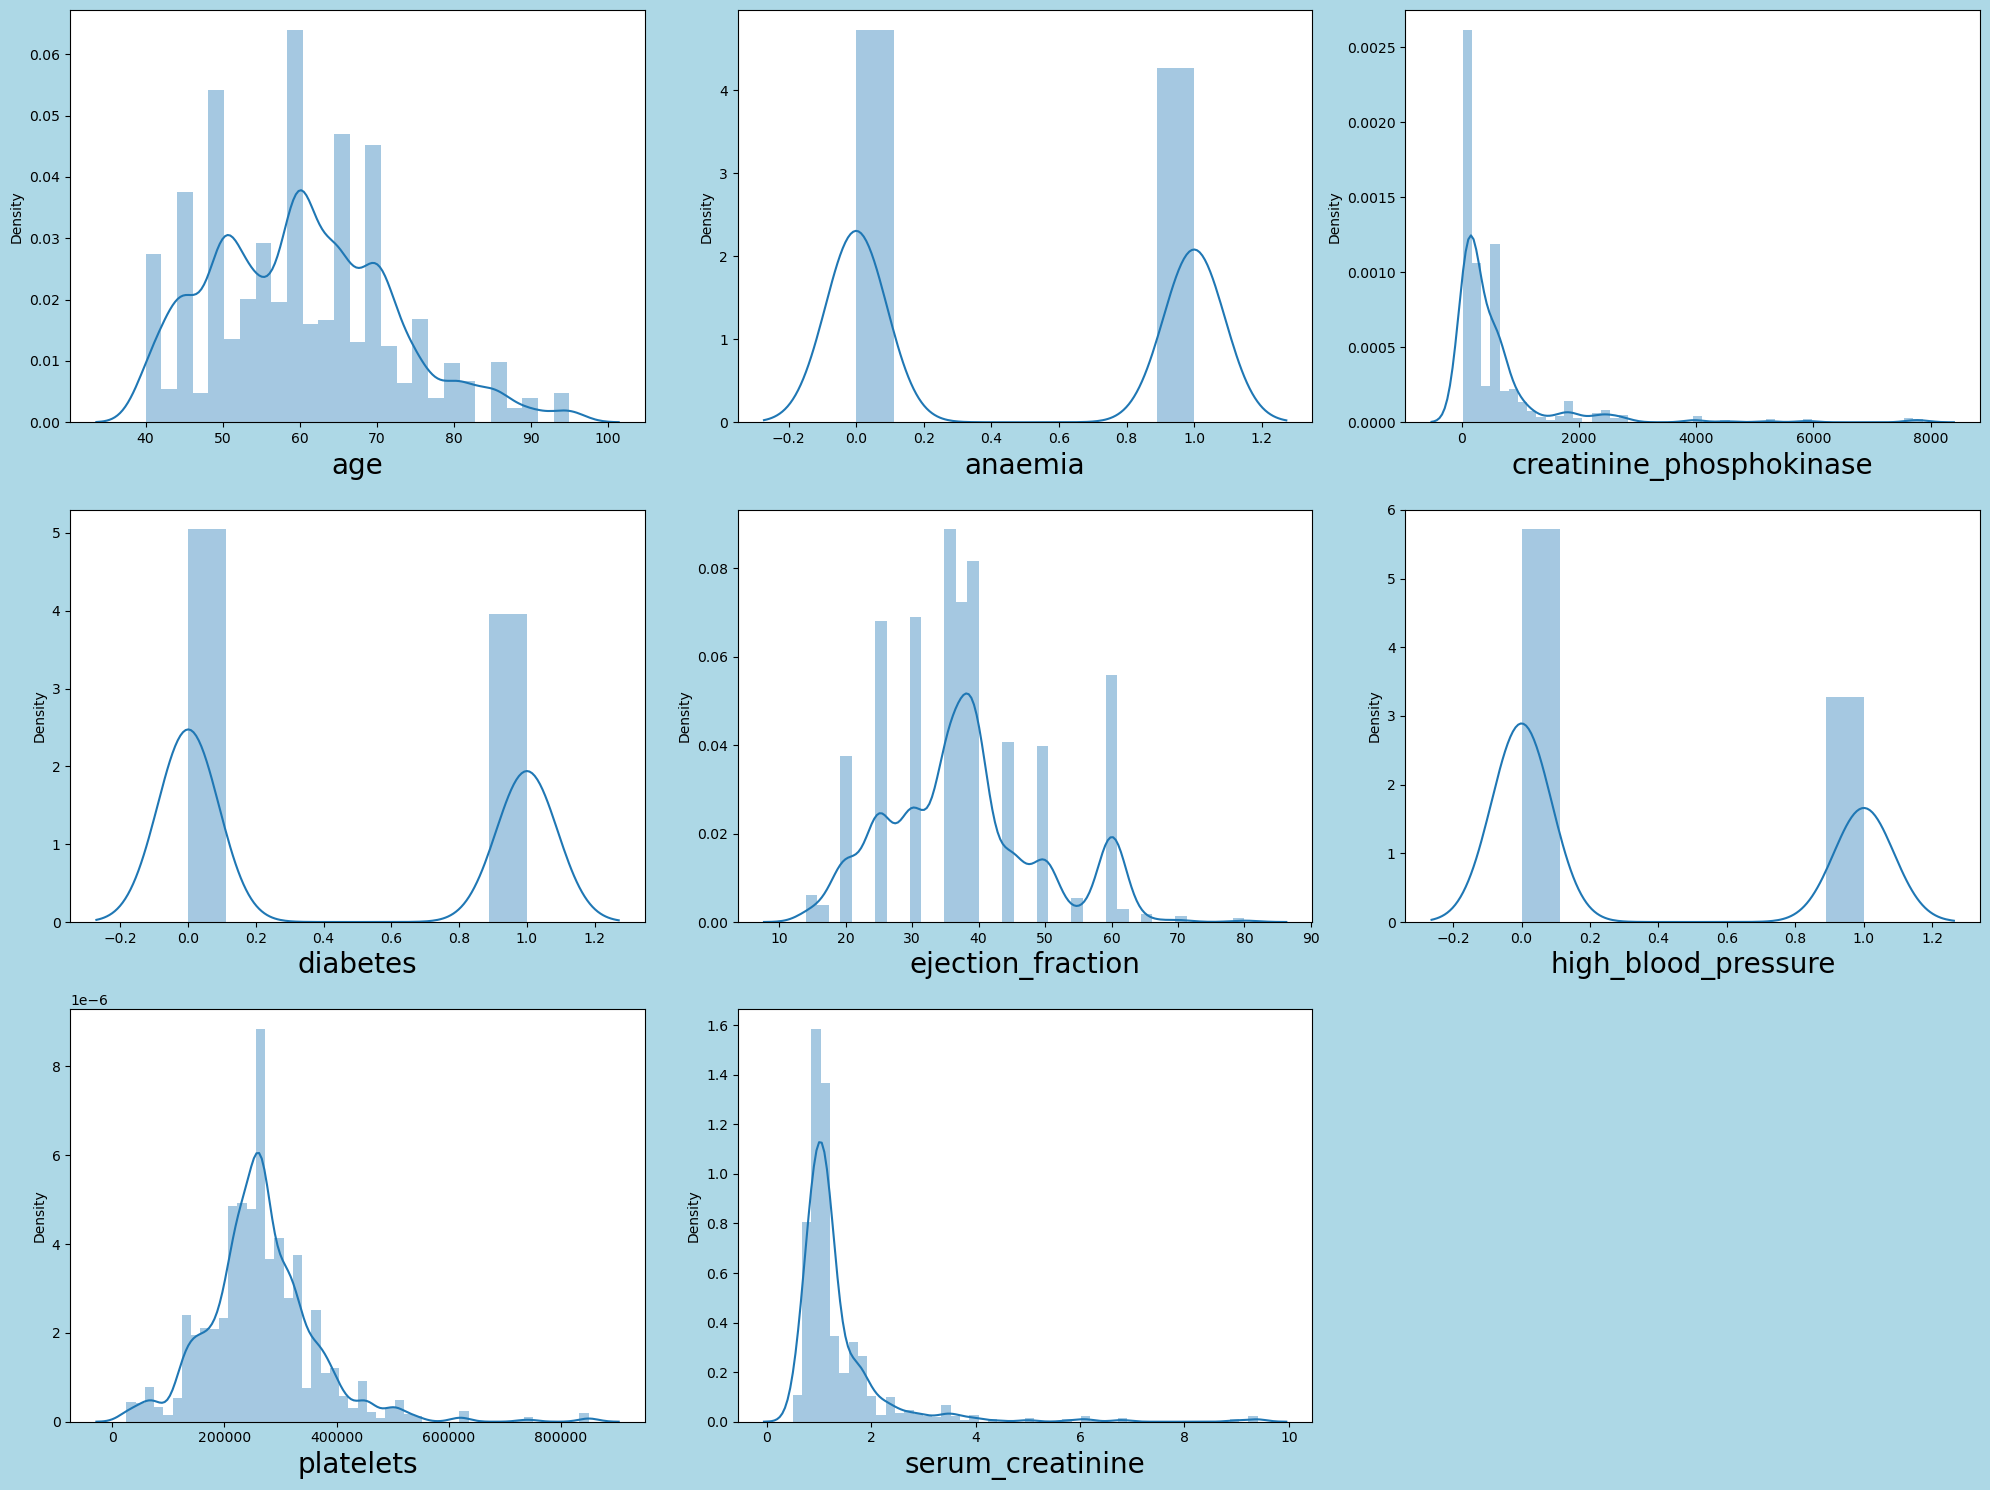

In [10]:
# Data distribution plot

plt.figure(figsize=(20,15),facecolor='lightblue')
plotnumber = 1

for column in df:
    if plotnumber <= 8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

# to remove outliers by using Z-score(standard normal distribution)

In [11]:
from scipy.stats import zscore

z_score = zscore(df)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2).all(axis=1)

df = df[filtering_entry]
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000
mean,58.642232,0.490496,450.189336,0.445075,37.442607,0.380647,259142.464838,1.147319,137.287090,0.628240,0.318440,136.543569,0.265367
std,10.118890,0.499971,519.755569,0.497035,11.228331,0.485606,75465.751356,0.390969,3.612841,0.483334,0.465929,74.986252,0.441583
min,40.000000,0.000000,25.000000,0.000000,15.000000,0.000000,70000.000000,0.500000,128.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,118.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,135.000000,0.000000,0.000000,79.000000,0.000000
50%,60.000000,0.000000,231.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,121.000000,0.000000
75%,65.000000,1.000000,582.000000,1.000000,45.000000,1.000000,305000.000000,1.200000,140.000000,1.000000,1.000000,205.500000,1.000000
max,82.000000,1.000000,2522.000000,1.000000,60.000000,1.000000,461000.000000,3.000000,145.000000,1.000000,1.000000,285.000000,1.000000


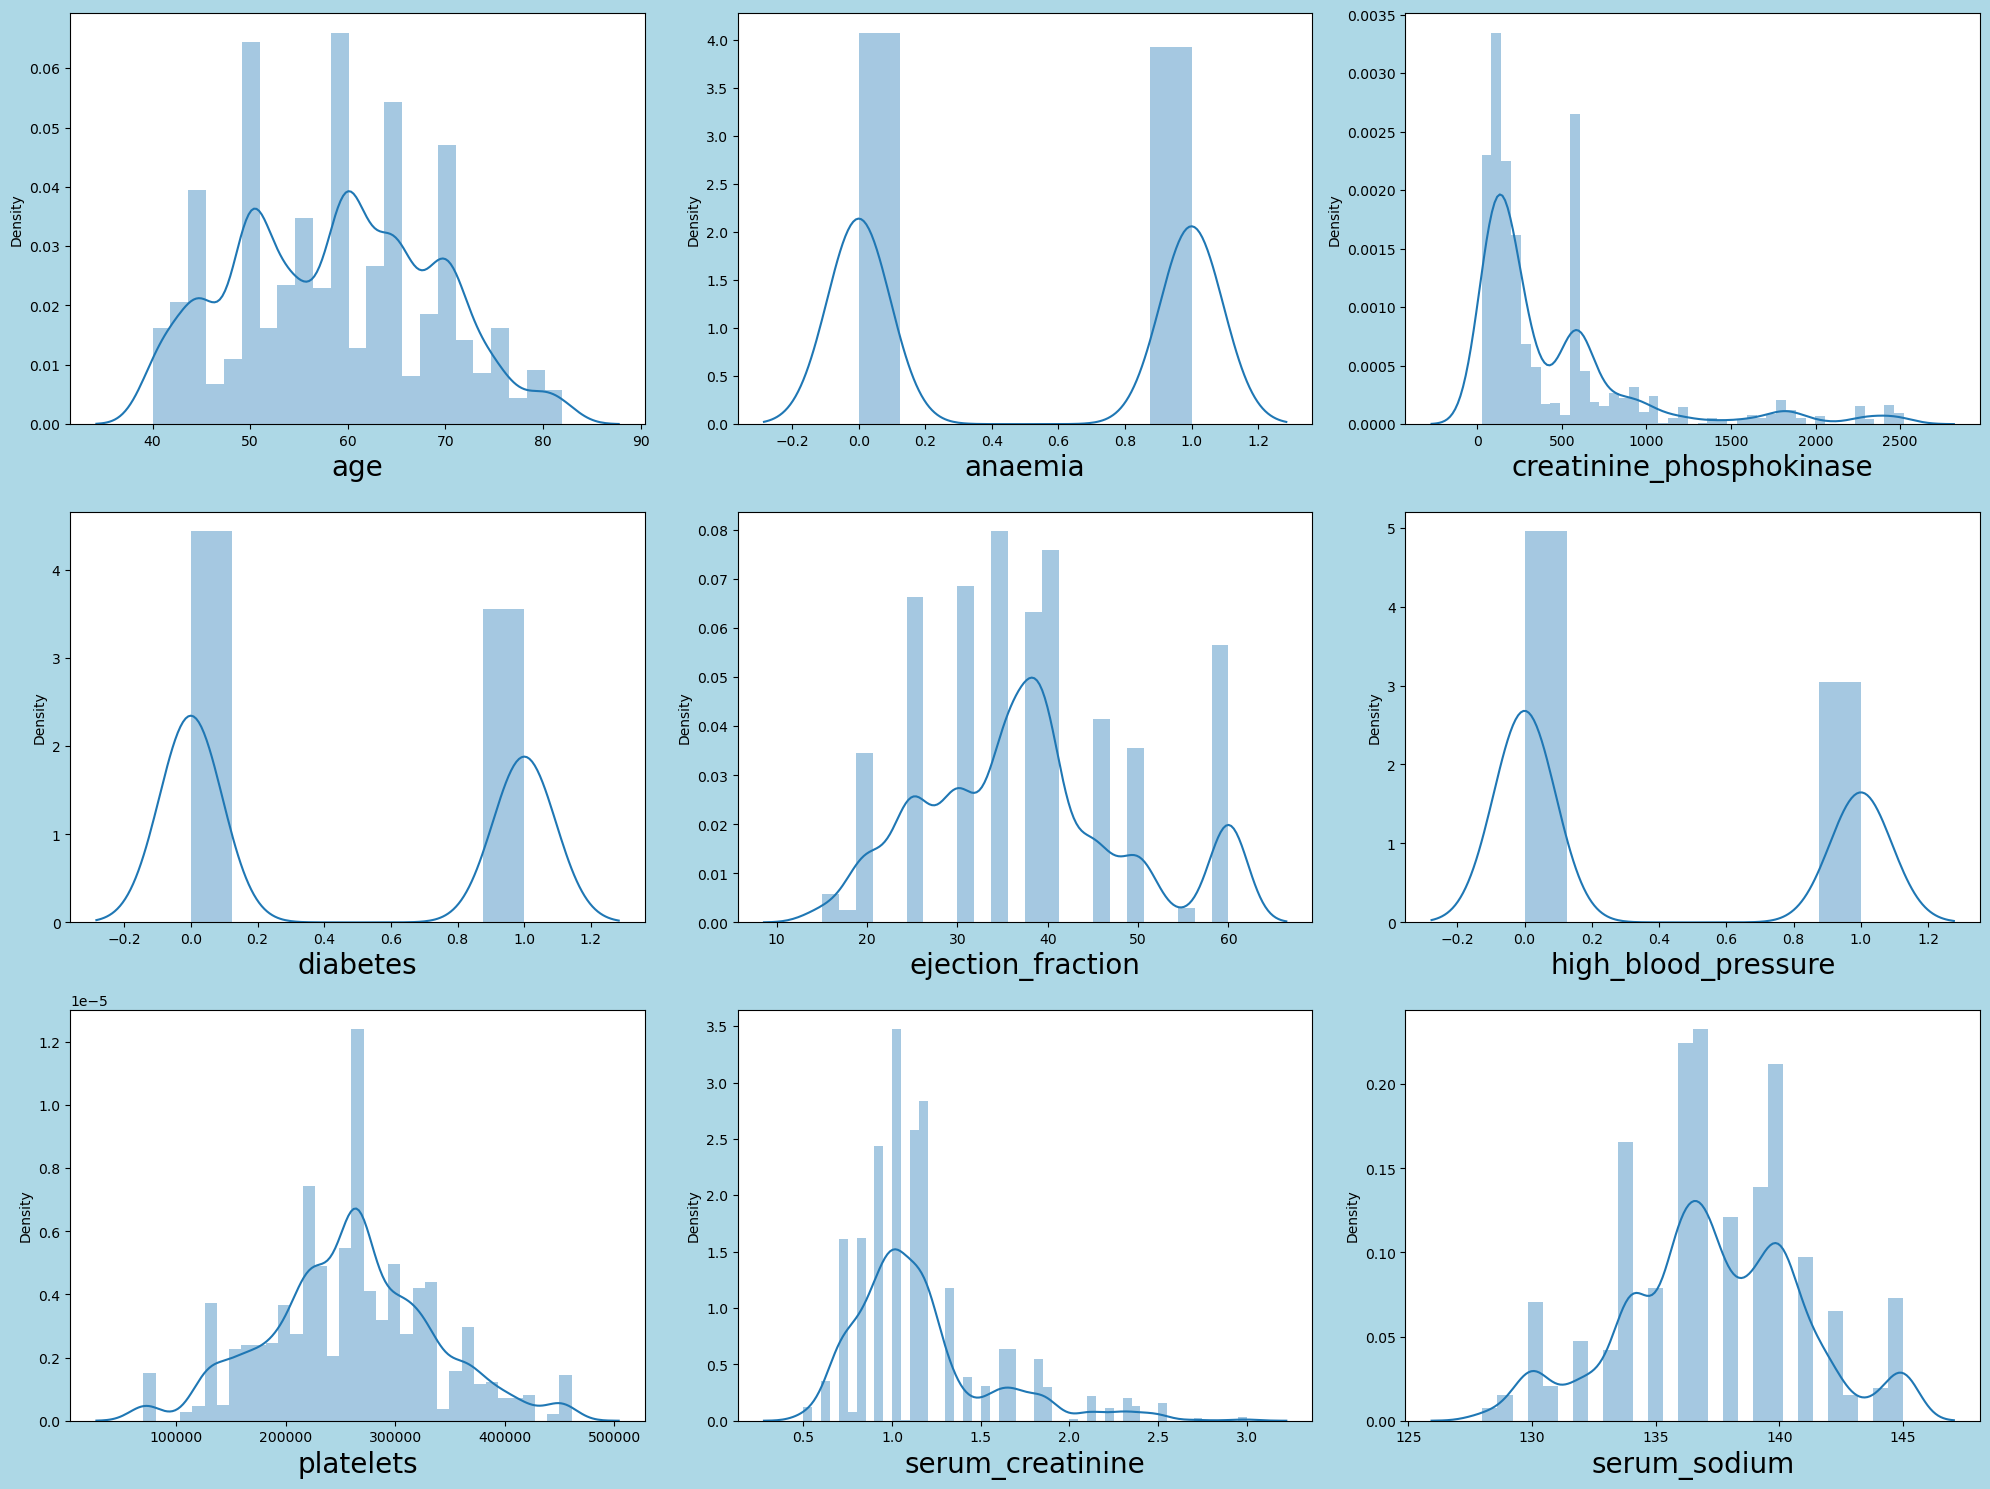

In [12]:
plt.figure(figsize=(20,15),facecolor='lightblue')
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()   

# Data Visualization

In [13]:
df['high_blood_pressure'].value_counts()

0    2509
1    1542
Name: high_blood_pressure, dtype: int64

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

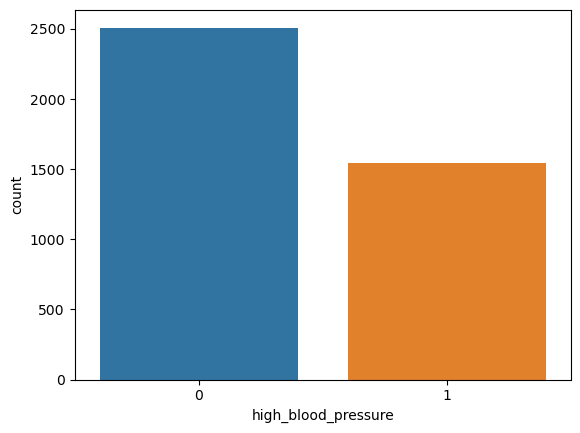

In [14]:
sns.countplot(df['high_blood_pressure'],label = 'count')

In [15]:
df['diabetes'].value_counts()

0    2248
1    1803
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

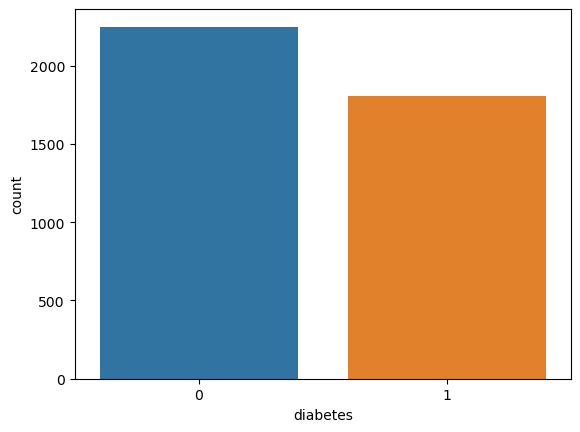

In [16]:
sns.countplot(df['diabetes'], label = 'count')

In [17]:
df['smoking'].value_counts()

0    2761
1    1290
Name: smoking, dtype: int64

<AxesSubplot:xlabel='smoking', ylabel='count'>

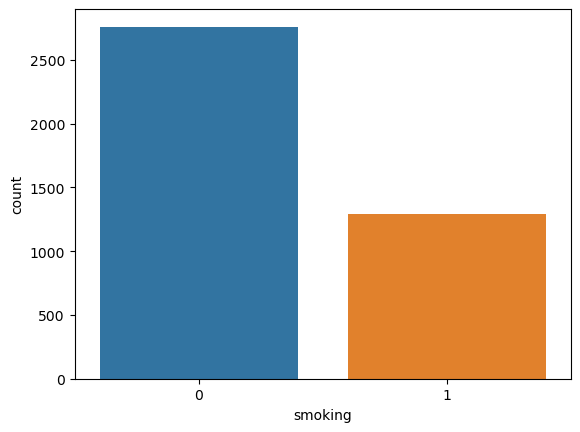

In [18]:
sns.countplot(df['smoking'],label = 'count')

In [19]:
df['anaemia'].value_counts()

0    2064
1    1987
Name: anaemia, dtype: int64

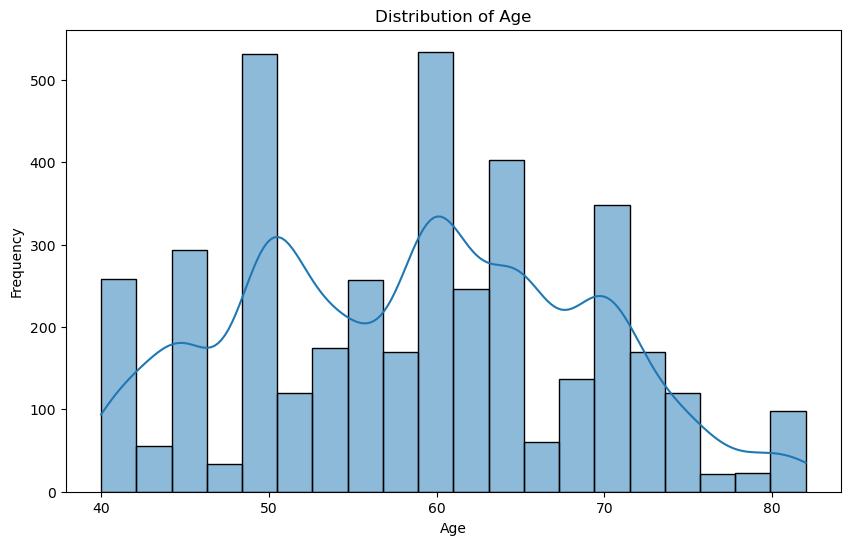

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

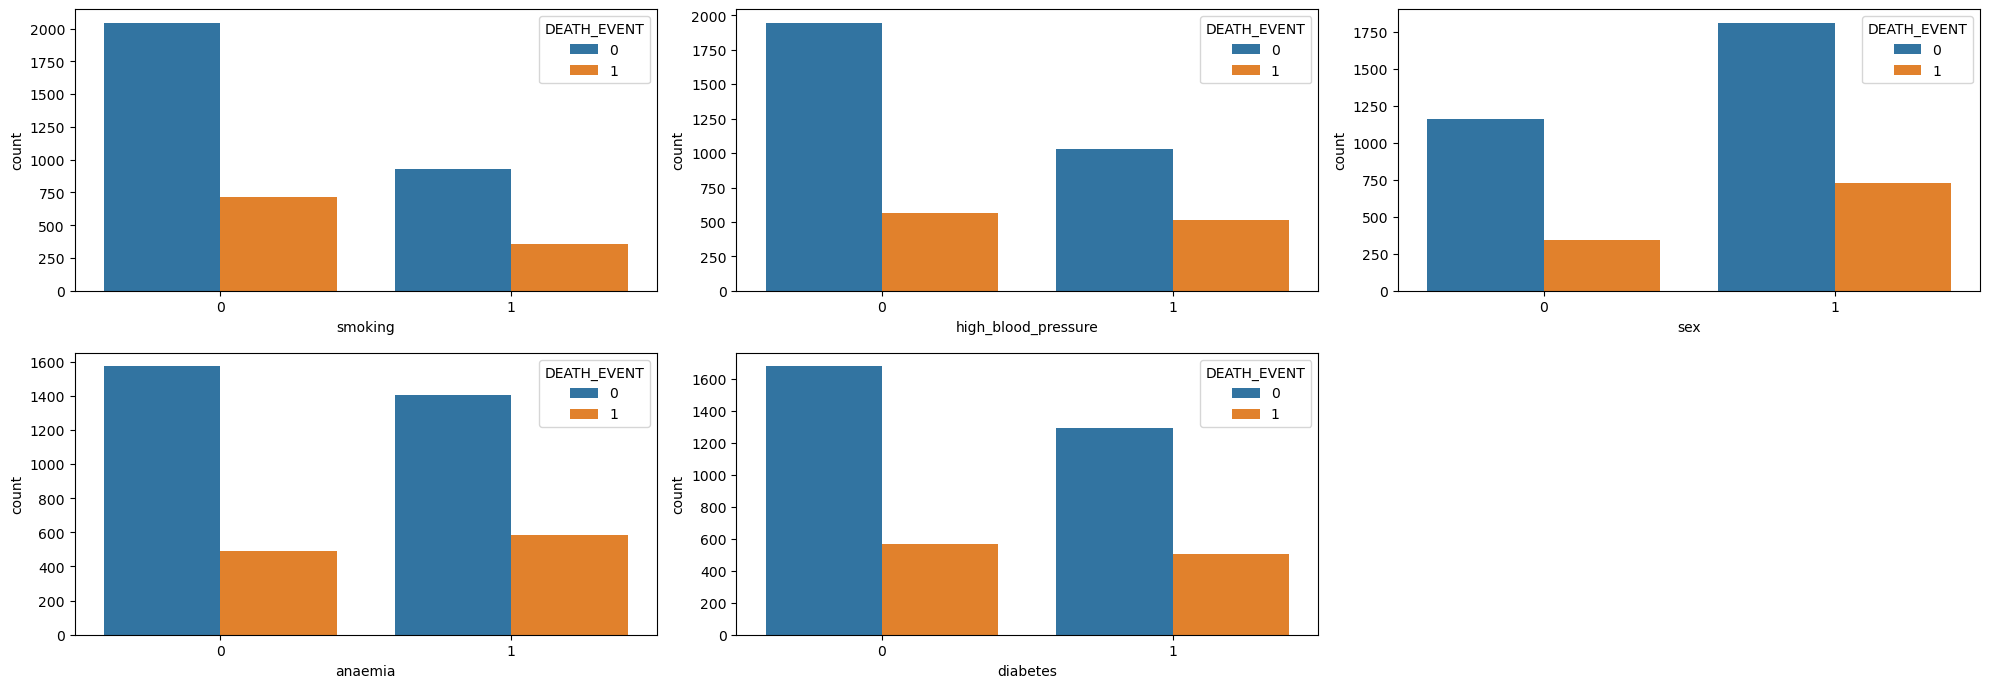

In [21]:
plt.figure(figsize=(20,10))
plotnumber = 1

for column in df[['smoking','high_blood_pressure','sex','anaemia','diabetes']]:
    if plotnumber<= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[column],data=df,hue='DEATH_EVENT')
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1   
plt.tight_layout() 

1.From the above plot we conclude that the majority of people who has a heart failure are Male

2.Smoking doesn't affect on the heart failure.

# we check multicolinearity using heat map

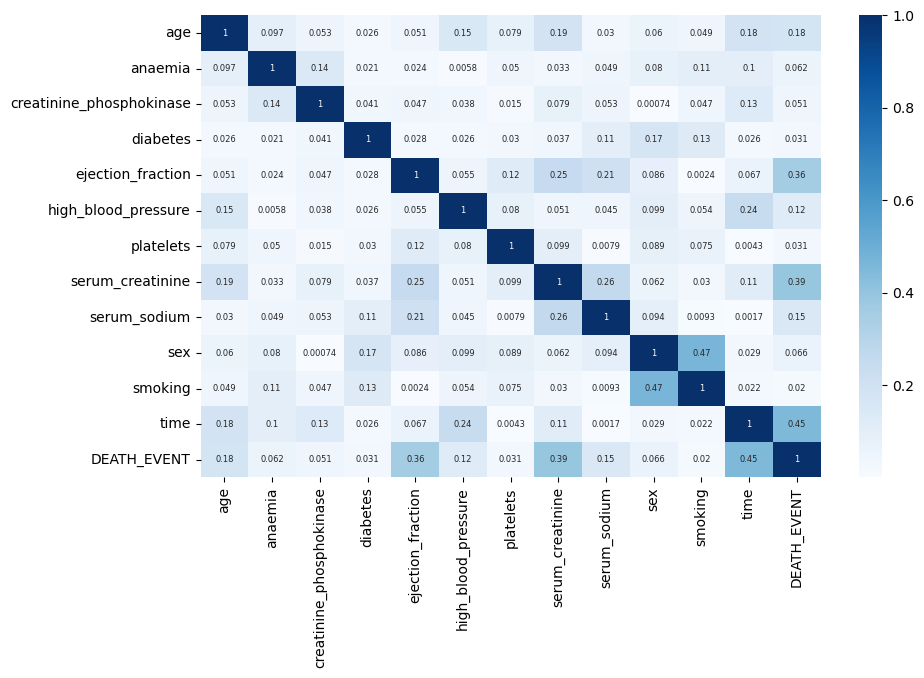

In [22]:
df_corr = df.corr().abs()

plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True,annot_kws={'size':6},cmap='Blues')
plt.show()

Insight: There are no correlation about each other of features.so no need to drop any feature

In [23]:
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model prediction

In [25]:
def metric_score(reg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n--------------------------Train result----------------------------------')
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        print("Classification Report:\n", classification_report(y_train, y_pred))
    else:
        y_pred = reg.predict(x_test)
        print('\n--------------------------Test result----------------------------------')
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
        print("Classification Report:\n", classification_report(y_test, y_pred))

# Logistic Regression

In [40]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [41]:
metric_score(reg,x_train,x_test,y_train,y_test, train=True)

metric_score(reg,x_train,x_test,y_train,y_test, train=False)


--------------------------Train result----------------------------------
Accuracy Score: 85.37%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      2395
           1       0.81      0.58      0.67       845

    accuracy                           0.85      3240
   macro avg       0.84      0.76      0.79      3240
weighted avg       0.85      0.85      0.84      3240


--------------------------Test result----------------------------------
Accuracy Score: 83.85%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89       581
           1       0.81      0.56      0.66       230

    accuracy                           0.84       811
   macro avg       0.83      0.75      0.78       811
weighted avg       0.84      0.84      0.83       811



In [42]:
y_pred = reg.predict(x_test)

print('Logistic Regression')
print('--'*30)
model_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', model_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 83.85 %


Precision: 0.81
Recall: 0.56
------------------------------------------------------------


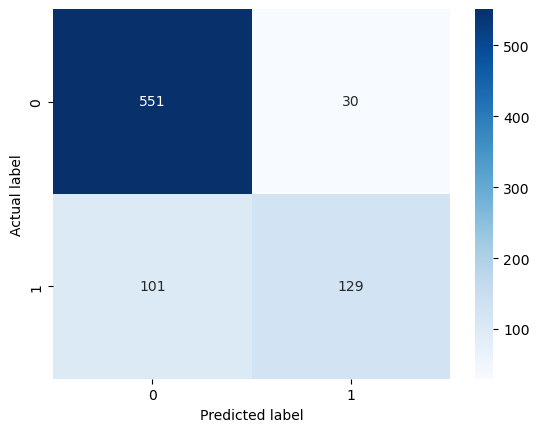

In [43]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d",cmap='Blues')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)

# Random Forest Classifier

In [30]:
reg = RandomForestClassifier(random_state=42)
reg.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [31]:
metric_score(reg,x_train,x_test,y_train,y_test, train=True)

metric_score(reg,x_train,x_test,y_train,y_test, train=False)


--------------------------Train result----------------------------------
Accuracy Score: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2395
           1       1.00      1.00      1.00       845

    accuracy                           1.00      3240
   macro avg       1.00      1.00      1.00      3240
weighted avg       1.00      1.00      1.00      3240


--------------------------Test result----------------------------------
Accuracy Score: 99.51%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       581
           1       1.00      0.99      0.99       230

    accuracy                           1.00       811
   macro avg       1.00      0.99      0.99       811
weighted avg       1.00      1.00      1.00       811



In [32]:
y_pred = reg.predict(x_test)

print('Random Forest Classifier')
print('--'*30)
model_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', model_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 99.51 %


Precision: 0.00
Recall: 0.00
------------------------------------------------------------


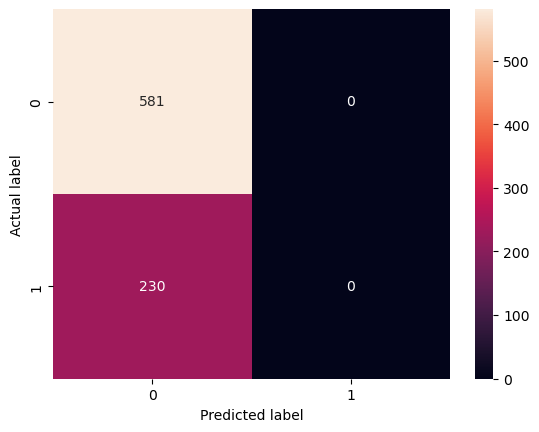

In [39]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)

# Support Vector Machine

In [34]:
reg = SVC()
reg.fit(x_train,y_train)

SVC()

In [35]:
metric_score(reg,x_train,x_test,y_train,y_test, train=True)

metric_score(reg,x_train,x_test,y_train,y_test, train=False)


--------------------------Train result----------------------------------
Accuracy Score: 73.92%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      2395
           1       0.00      0.00      0.00       845

    accuracy                           0.74      3240
   macro avg       0.37      0.50      0.43      3240
weighted avg       0.55      0.74      0.63      3240


--------------------------Test result----------------------------------
Accuracy Score: 71.64%
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.83       581
           1       0.00      0.00      0.00       230

    accuracy                           0.72       811
   macro avg       0.36      0.50      0.42       811
weighted avg       0.51      0.72      0.60       811



In [36]:
y_pred = reg.predict(x_test)

print('Support Vector Machine')
print('--'*30)
model_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', model_accuracy,'%')

Support Vector Machine
------------------------------------------------------------
Accuracy 71.64 %


<AxesSubplot:>

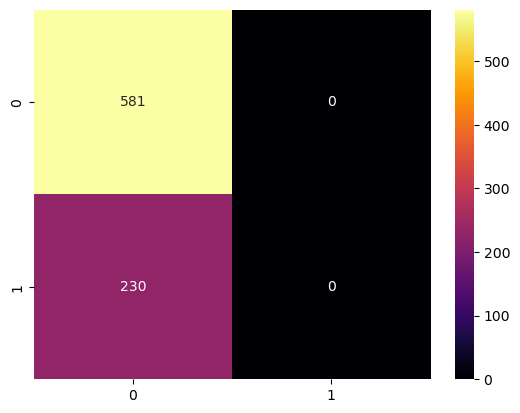

In [37]:
cm = confusion_matrix(y_test, y_pred)

cm

sns.heatmap(cm, annot=True, fmt="d",cmap='inferno')